## Credit Scoring Statistics and Prediction

Susan Sun

**Course:** CISD 43 – BIG DATA (Spring, 2024)

Dataset: https://www.kaggle.com/datasets/nightcrawler101/creditscoring-csv

### Problem Statement
* This project aims to analyze credit status through the analysis of a variety of client factors such as job seniority, home ownership, age, and debt. By applying exploratory data analysis and machine learning I attempted to create and train a model that could predict the target variable 'Status' through metrics including accuracy, precision, and recall.

### Required packages

In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 
import re

#Display plots inline
%matplotlib inline

#Filter out warnings
import warnings
warnings.filterwarnings('ignore')

### Methodology

1. Explan your big data metodology



2. Introduce the topics you used in your project
 * Model 1
    * KNN
 
 * Model 2
    * Linear Regression
 

### Exploratory Data Analysis

In [2]:
#Read the data file
df=pd.read_csv('data/CreditScoring.csv')

In [3]:
#Show the head of the data frame
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
#Check the unique values in 'Status'
print(df['Status'].unique())

[1 2 0]


In [5]:
#See how many times 0 is a value in the column 'Status'
zeros = (df['Status'] == 0).sum()
print(zeros)

1


In [6]:
#Remove 0 from 'Status' our target column
df = df[df['Status'] != 0]

In [7]:
#Replace all the 1s with 0 and the 2s with 0 since this will be our target column
df['Status'] = df['Status'].replace({1: 0, 2: 1})
#Check
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,0,9,1,60,30,2,1,3,73,129,0,0,800,846
1,0,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,1,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,0,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,0,0,1,36,26,1,1,1,46,107,0,0,310,910


In [8]:
#Show dataset information to inspect all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4454 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Status     4454 non-null   int64
 1   Seniority  4454 non-null   int64
 2   Home       4454 non-null   int64
 3   Time       4454 non-null   int64
 4   Age        4454 non-null   int64
 5   Marital    4454 non-null   int64
 6   Records    4454 non-null   int64
 7   Job        4454 non-null   int64
 8   Expenses   4454 non-null   int64
 9   Income     4454 non-null   int64
 10  Assets     4454 non-null   int64
 11  Debt       4454 non-null   int64
 12  Amount     4454 non-null   int64
 13  Price      4454 non-null   int64
dtypes: int64(14)
memory usage: 522.0 KB


In [9]:
#Show columns with missing data
missing = df.isnull().sum()
print(missing)

Status       0
Seniority    0
Home         0
Time         0
Age          0
Marital      0
Records      0
Job          0
Expenses     0
Income       0
Assets       0
Debt         0
Amount       0
Price        0
dtype: int64


In [10]:
#Show if there are duplicates
duplicates = df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
4450    False
4451    False
4452    False
4453    False
4454    False
Length: 4454, dtype: bool


In [36]:
#Exploring Numerical Data
df.describe()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
count,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4.454000e+03,4.454000e+03,4.454000e+03,4454.000000,4454.000000
mean,0.281545,7.986753,2.656938,46.438707,37.080377,1.879210,1.173552,1.676022,55.573417,7.634883e+05,1.060578e+06,4.044728e+05,1038.918276,1462.780198
std,0.449803,8.174306,1.610640,14.655462,10.984598,0.643685,0.378766,0.954089,19.515634,8.704595e+06,1.021870e+07,6.344963e+06,474.545999,628.128120
min,0.000000,0.000000,0.000000,6.000000,18.000000,0.000000,1.000000,0.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,0.000000,2.000000,2.000000,36.000000,28.000000,2.000000,1.000000,1.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.250000
50%,0.000000,5.000000,2.000000,48.000000,36.000000,2.000000,1.000000,1.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,1.000000,12.000000,4.000000,60.000000,45.000000,2.000000,1.000000,3.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1691.500000
max,1.000000,48.000000,6.000000,72.000000,68.000000,5.000000,2.000000,4.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [11]:
df.columns

Index(['Status', 'Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records',
       'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'],
      dtype='object')

### Visualizations

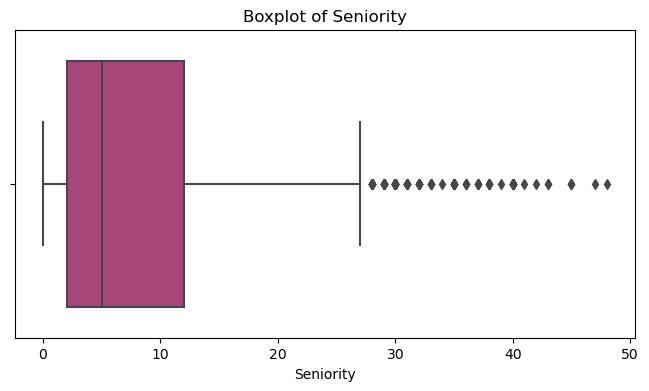

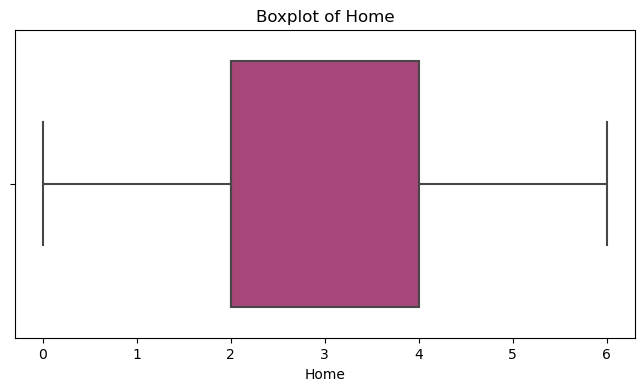

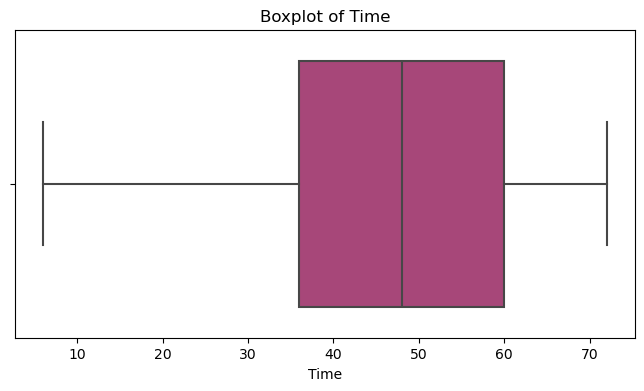

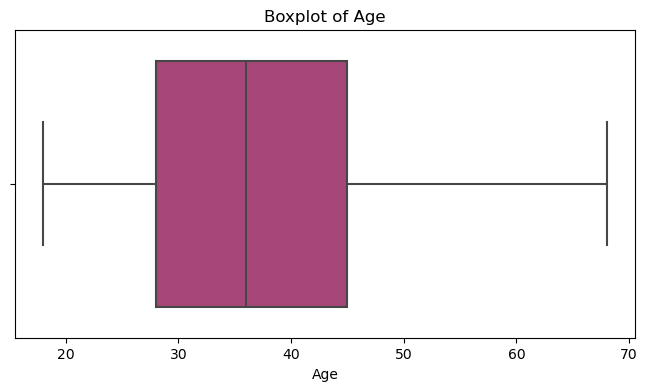

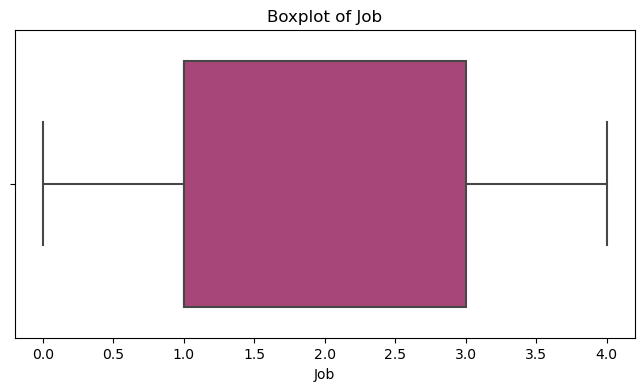

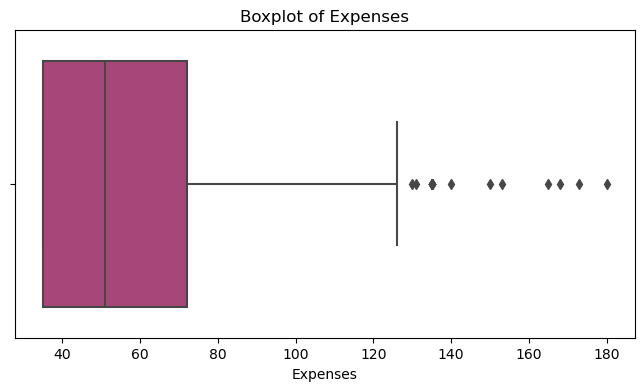

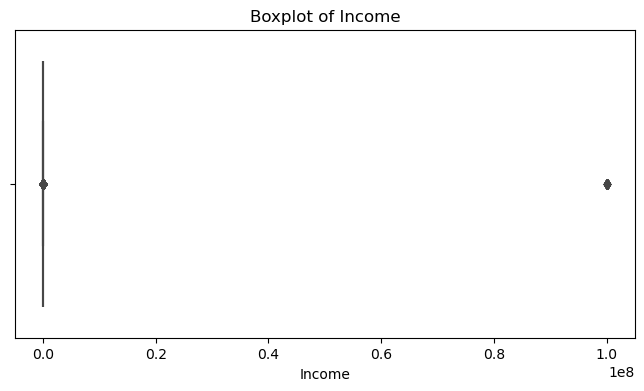

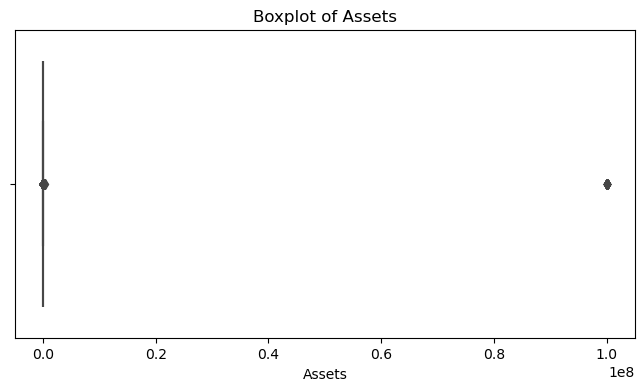

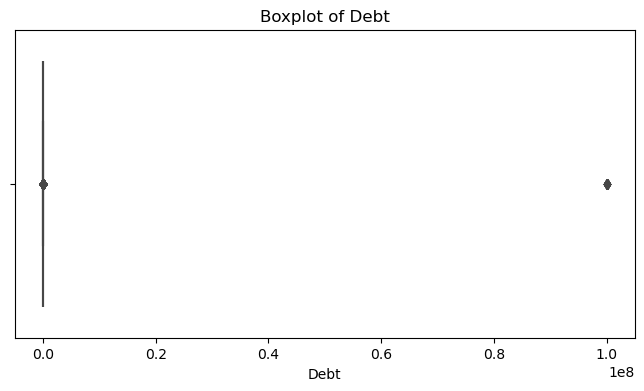

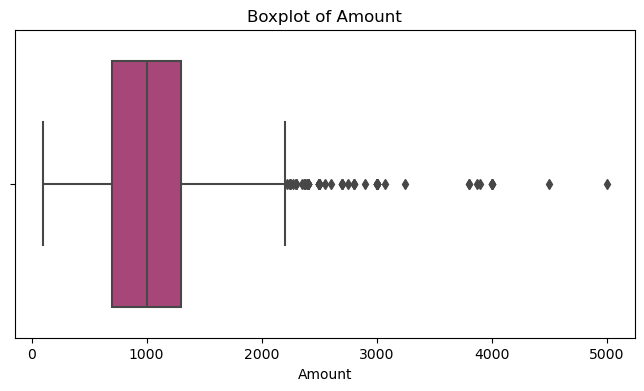

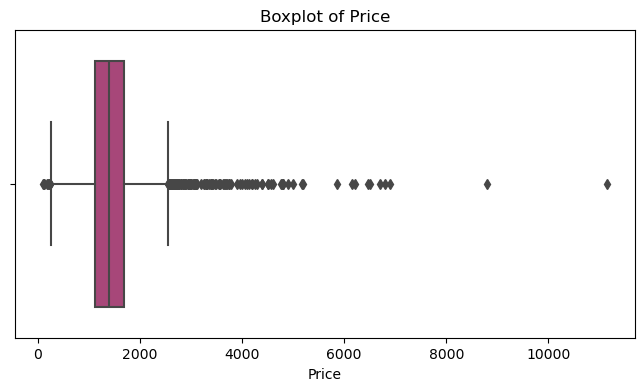

In [37]:
#Create boxplot for columns to check for outliers
numerical_columns = ['Seniority', 'Home', 'Time', 'Age',
       'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price']

#Create a boxplot for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], palette='magma')
    plt.title(f'Boxplot of {col}')
    plt.show()

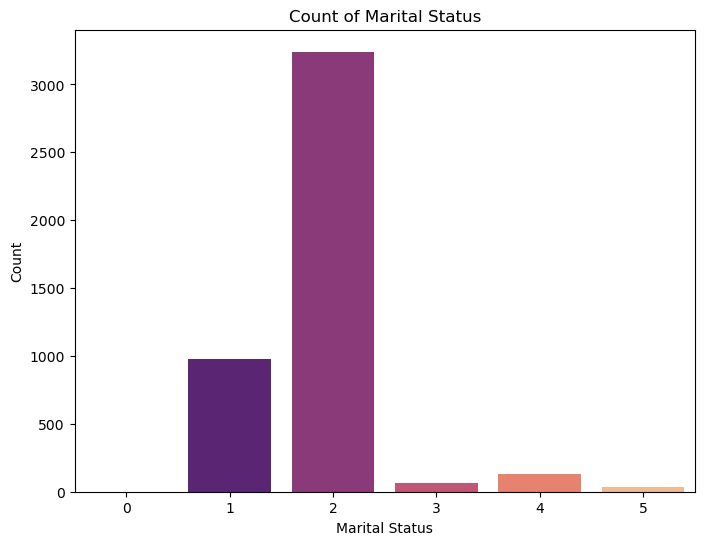

In [12]:
#Make a barplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital', data=df, palette='magma')
#Add labels
plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
#Plot
plt.show()

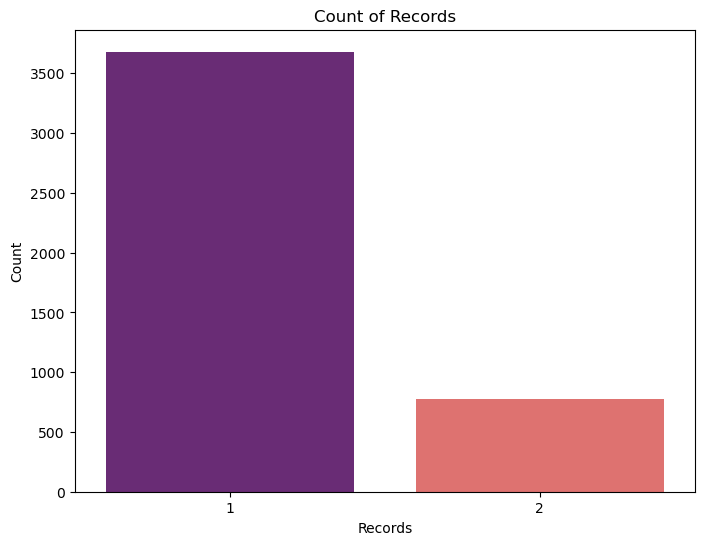

In [13]:
#Make a barplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Records', data=df, palette='magma')
#Add labels
plt.title('Count of Records')
plt.xlabel('Records')
plt.ylabel('Count')
#Plot
plt.show()

(array([3200.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1254.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

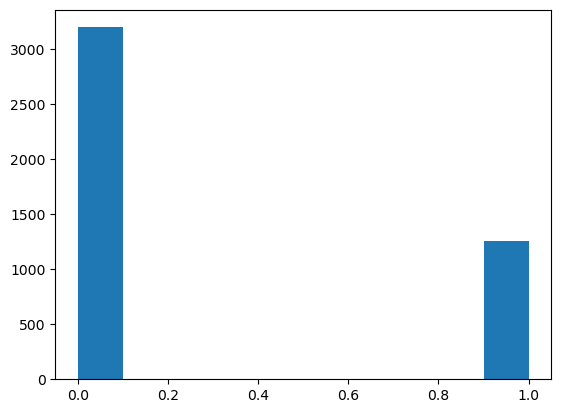

In [39]:
#Check whether the dataset is inbalanced
plt.hist(df.Status)

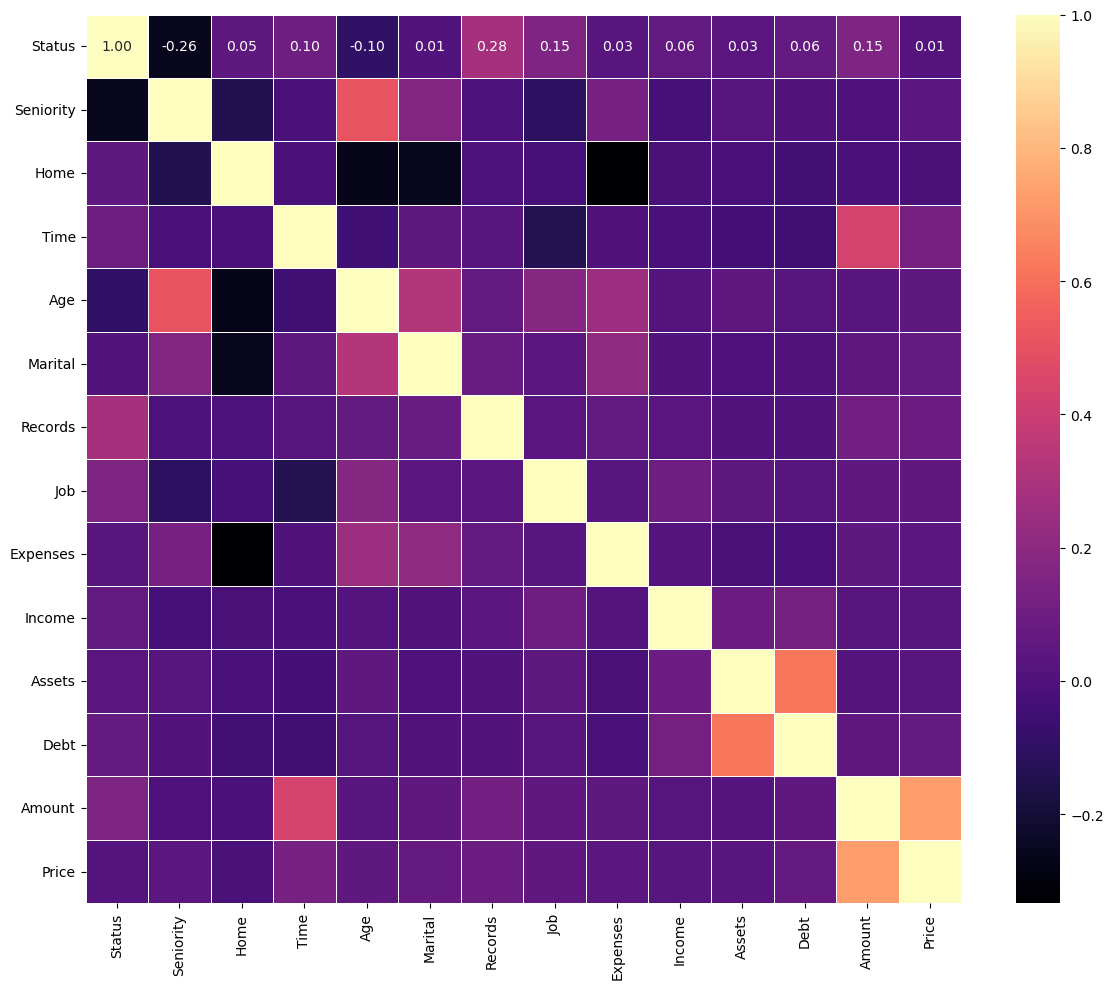

In [15]:
#Calculate correlation matrix for numerical columns
correlation_matrix = df.corr()
#Create a heatmap 
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', linewidths=0.5, fmt='.2f', cbar=True)
#Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [16]:
#View the correlation matrix
correlation_matrix

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
Status,1.000000,-0.260393,0.051208,0.100627,-0.095301,0.009673,0.278605,0.152416,0.028855,0.059805,0.032953,0.062417,0.154549,0.010740
Seniority,-0.260393,1.000000,-0.145891,-0.021374,0.505920,0.163544,-0.015649,-0.109307,0.125873,-0.034258,0.026386,0.005728,-0.007913,0.040887
Home,0.051208,-0.145891,1.000000,-0.020927,-0.270770,-0.260703,-0.013183,-0.032010,-0.334085,-0.022964,-0.020384,-0.043581,-0.019608,-0.026576
Time,0.100627,-0.021374,-0.020927,1.000000,-0.051749,0.050277,0.028193,-0.138328,-0.000840,-0.020229,-0.039473,-0.051162,0.430936,0.129674
Age,-0.095301,0.505920,-0.270770,-0.051749,1.000000,0.325427,0.060067,0.179306,0.248059,0.010633,0.053065,0.015957,0.029154,0.048916
Marital,0.009673,0.163544,-0.260703,0.050277,0.325427,1.000000,0.082319,0.033897,0.210062,0.004437,-0.007857,0.000965,0.054445,0.062761
Records,0.278605,-0.015649,-0.013183,0.028193,0.060067,0.082319,1.000000,0.033827,0.057229,0.034732,0.004915,0.008191,0.110464,0.085219
Job,0.152416,-0.109307,-0.032010,-0.138328,0.179306,0.033897,0.033827,1.000000,0.024006,0.102793,0.049124,0.029058,0.055996,0.056611
Expenses,0.028855,0.125873,-0.334085,-0.000840,0.248059,0.210062,0.057229,0.024006,1.000000,0.010645,-0.023282,-0.018917,0.049200,0.040330
Income,0.059805,-0.034258,-0.022964,-0.020229,0.010633,0.004437,0.034732,0.102793,0.010645,1.000000,0.092040,0.116398,0.019680,0.023103


### Machine Learning

* K-Nearest Neighbors (KNN)
In this analysis, the model being used is K-Nearest Neighbors (KNN) Classifier is used to categorize an applicant into one of two classes, 0 being denied, 1 being accepted. A confusion matrix is used to evaluate its performance.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [18]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,0,9,1,60,30,2,1,3,73,129,0,0,800,846
1,0,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,1,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,0,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,0,0,1,36,26,1,1,1,46,107,0,0,310,910


In [19]:
# Feature and target variables
X = df.drop('Status', axis=1)
y = df['Status']

#features = ['Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records', 'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price']
#X = df[features]

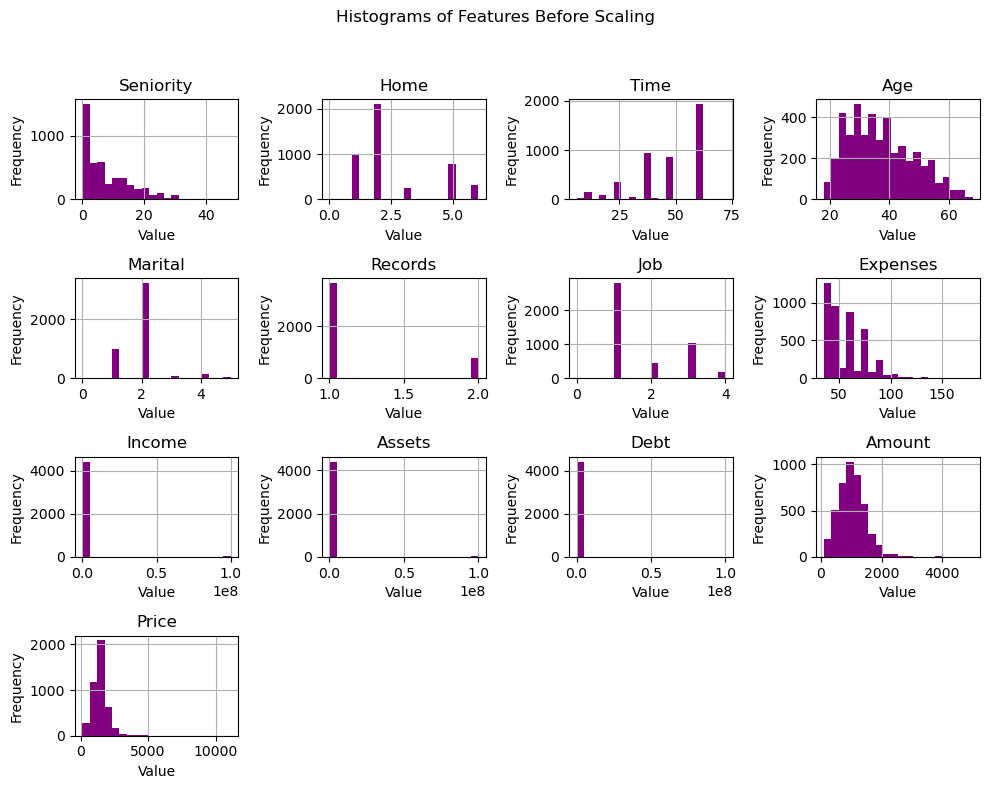

In [21]:
# Plot before scaling
axes = X.hist(figsize=(10, 8), bins=20,color='#800080')

# Iterate over each subplot and set the titles
for ax in axes.flatten():
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.suptitle('Histograms of Features Before Scaling')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the padding to make room for the suptitle
plt.show()

In [22]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

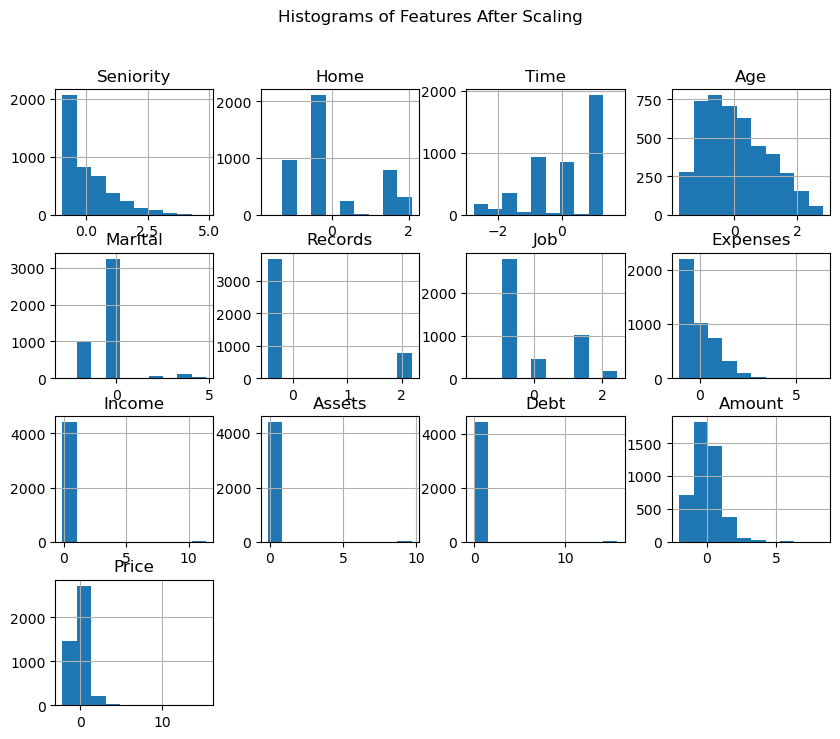

In [24]:
features = ['Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records', 'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price']
X_scaled = scaler.fit_transform(X)
# Convert the scaled features back to a DataFrame for ease of plotting
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_scaled_df.hist(figsize=(10, 8))
plt.suptitle('Histograms of Features After Scaling')
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the range of k values to test
param_grid = {'n_neighbors': range(1, 31)}
knn = KNeighborsClassifier()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Optimal k
best_k = grid_search.best_params_['n_neighbors']
print(f"Optimal k: {best_k}")


Optimal k: 11


In [26]:
#Create KNN classifier
k = 11 #Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

In [27]:
# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [28]:
# Predict on the test data
y_pred = knn.predict(X_test)

In [29]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))

[[566  49]
 [177  99]]


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       615
           1       0.67      0.36      0.47       276

    accuracy                           0.75       891
   macro avg       0.72      0.64      0.65       891
weighted avg       0.73      0.75      0.72       891



### Conclusions


Through exploratory data analysis and machine learning, specifically the K-Nearest
Neighbors (KNN) classifier, the goal of predicting credit status based on client factors was
partially achieved. The model demonstrated an overall accuracy of 75%, with varying
performance across different evaluation metrics. For Status = 0, the model achieved a high
precision of 0.76 and recall of 0.92, indicating strong performance in correctly identifying denied
applications. However, for Status = 1 the precision dropped to 0.67, and recall was 0.36, showing
a significant challenge in identifying accepted applications. This may have been due to the
imbalanced dataset

### Credits

This project is based on previous original work from prior classes as well as course materials.

Github publication: 